<a href="https://colab.research.google.com/github/surajacharya12/Predicting-Building-Damage-Grade-by-Earthquake-and-Hitters-dataset-to-predict-player-salaries/blob/main/Copy_of_Predicting_Building_Damage_Grade_by_Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Topic:** Predicting Earthquake Damage Grades of Buildings

This project aims to predict the damage grade of buildings caused by earthquakes using various structural and locational features. The core idea is to build a machine learning model that can learn the relationships between building characteristics and the extent of damage they sustain during an earthquake.

**Underlying Theory:**

The project is based on the premise that the structural integrity, construction materials, age, location, and other physical attributes of a building significantly influence its vulnerability to earthquake damage. By analyzing a dataset containing information about these features and the corresponding damage grades observed after an earthquake, we can develop a predictive model. This model can then be used to assess the potential damage to other buildings with similar characteristics.

The process involves several key stages:

1.  **Data Collection and Understanding:** Gathering relevant data about buildings and their damage grades. Initial exploration helps in understanding the data types, distributions, and identifying any missing information.

2.  **Data Preprocessing:** Preparing the raw data for machine learning. This includes handling missing values, converting data types to a suitable format for the models, and potentially creating new features that can capture more meaningful information (feature engineering).

3.  **Exploratory Data Analysis (EDA):** Visualizing and analyzing the relationships between individual features and the target variable (damage grade). This step helps in gaining insights into which factors are most strongly associated with different levels of damage.

4.  **Model Selection and Training:** Choosing appropriate machine learning algorithms for the prediction task. Since the damage grade is a categorical variable (Grade 1 to 5), this is essentially a classification problem. Although some regression models were explored, a classification approach is generally more suitable for predicting discrete categories. The selected models are trained on a portion of the data (training set).

5.  **Model Evaluation:** Assessing the performance of the trained models on unseen data (testing set) using relevant metrics such as accuracy and Mean Squared Error (MSE). For classification tasks, metrics like accuracy, precision, recall, F1-score, and confusion matrices are typically used to understand how well the model distinguishes between different classes.

6.  **Interpretation (Optional but valuable):** Understanding why the model makes certain predictions can be crucial, especially for applications where insights into the driving factors of damage are needed. Techniques like feature importance can help in this regard.

In summary, this project leverages machine learning to build a predictive model for earthquake damage, using building features as input to forecast the damage grade. The goal is to create a tool that can help in assessing building vulnerability and potentially inform disaster preparedness and mitigation efforts.

#Cell 1:

Purpose: Imports fundamental libraries for numerical operations (numpy), data manipulation and analysis (pandas), and interacting with the operating system (os).

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


#Cell 2:

Purpose: Mounts Google Drive to the Colab environment, allowing access to files stored in the user's Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cell 3:

Purpose: Imports a comprehensive set of libraries for data visualization (matplotlib, seaborn), mathematical functions, data splitting and cross-validation (sklearn.model_selection), various data preprocessing techniques (sklearn.preprocessing, sklearn.feature_selection), building machine learning pipelines (sklearn.pipeline, sklearn.compose), machine learning models (sklearn.neighbors, sklearn.ensemble), and evaluation metrics (sklearn.metrics). This cell also loads the main dataset into a pandas DataFrame.


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from math import pi
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

roc_auc_score
# Load data into pandas
df_stru = pd.read_csv("/content/drive/MyDrive/2072dataset/csv_building_structure.csv",
                     index_col = 'building_id')


plt.style.use('ggplot')

#Cell 4:

Purpose: Displays the count of each data type present in the DataFrame and shows the data types of all columns.

In [ ]:
display(df_stru.dtypes.value_counts())
df_stru.dtypes

,count
int64,20
object,10


,0
district_id,int64
vdcmun_id,int64
ward_id,int64
count_floors_pre_eq,int64
count_floors_post_eq,int64
age_building,int64
plinth_area_sq_ft,int64
height_ft_pre_eq,int64
height_ft_post_eq,int64
land_surface_condition,object


#Cell 5:

Purpose: Explicitly converts specific columns ('district_id', 'vdcmun_id', 'ward_id') to the 'object' data type.

In [ ]:

df_stru = df_stru.astype({'district_id': 'object', 'vdcmun_id': 'object', 'ward_id': 'object'})

#Cell 6:

Purpose: Checks for and displays the number of missing values in each column, then removes rows containing any missing values from the DataFrame.

In [ ]:

df_temp = df_stru.isnull().sum().reset_index(name='count')
display(df_temp[df_temp['count'] > 0])
df_stru.dropna(inplace = True)

,index,count
14,position,1
15,plan_configuration,1
28,damage_grade,12
29,technical_solution_proposed,12


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'count'}, axis=1)
              .sort_values('count', ascending=True))
  xs = counted['count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Cell 7:

Purpose: Creates a bar plot showing the distribution of the 'damage_grade' column.


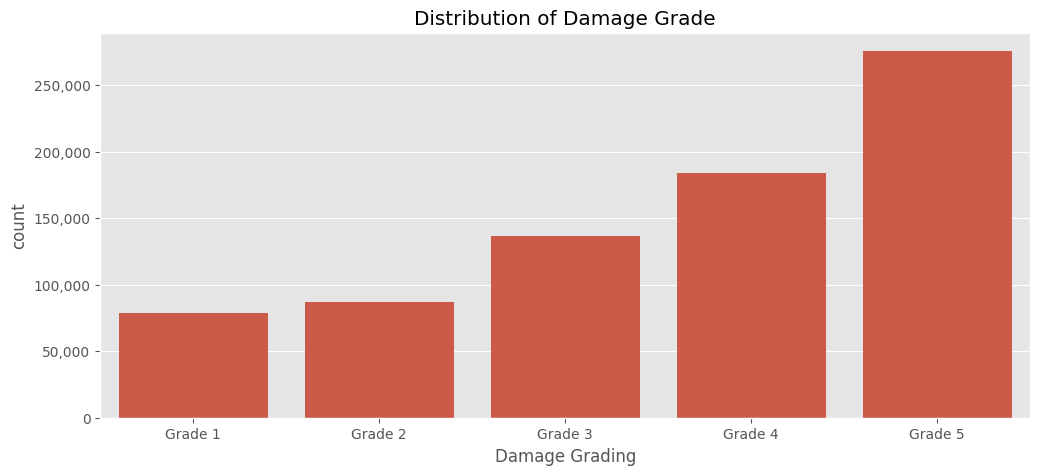

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=df_stru, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

#Cell 8:

Purpose: Identifies and displays the data types of columns that are of 'object' type (typically categorical).

In [ ]:
# view Names
df_stru.select_dtypes(include=object).dtypes # Data types

,0
district_id,object
vdcmun_id,object
ward_id,object
land_surface_condition,object
foundation_type,object
roof_type,object
ground_floor_type,object
other_floor_type,object
position,object
plan_configuration,object


#Cell 9:

Purpose: Analyzes the relationship between 'district_id' and 'damage_grade' by counting occurrences and visualizing the distribution using a heatmap.


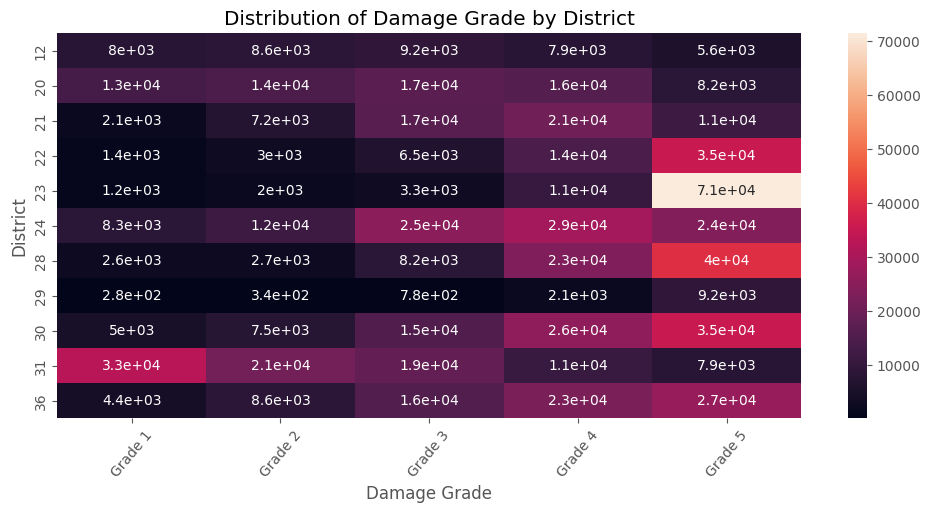

In [ ]:
# Calculate counts
df_temp = df_stru.groupby(['district_id','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['district_id', 'damage_grade'])


# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['district_id'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
plt.title("Distribution of Damage Grade by District")
plt.xlabel("Damage Grade")
plt.ylabel("District")
plt.show()

# Clean up
del df_temp, ax

#Cell 10:

Purpose: Visualizes the distribution of the 'land_surface_condition' column using a bar plot.

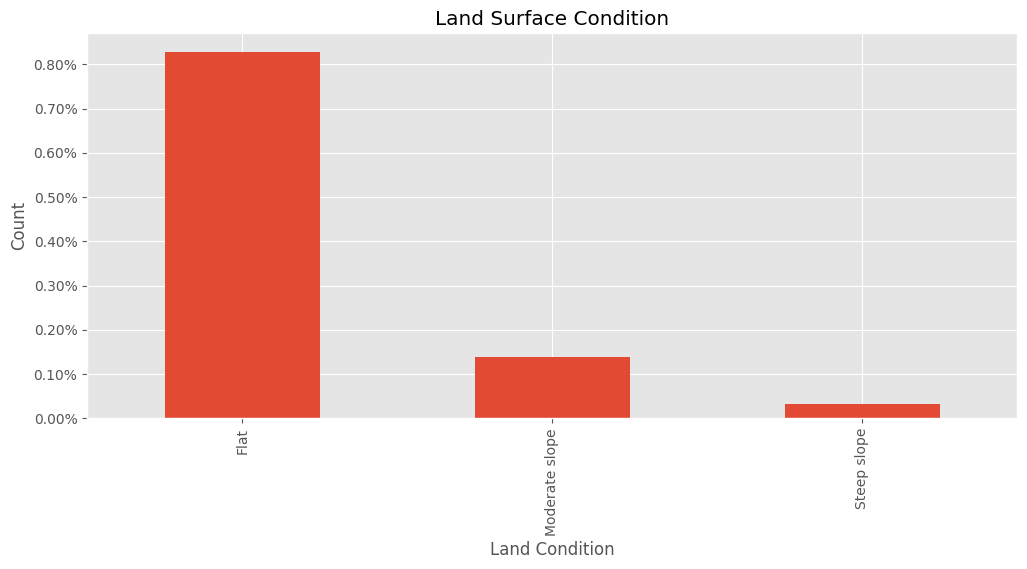

In [ ]:
# Create a plot
plt.figure(figsize=(12,5))
ax = df_stru.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()

# clean script
del ax

#Cell 11:

Purpose: Analyzes the relationship between 'land_surface_condition' and 'damage_grade' by counting occurrences and visualizing the distribution using a bar plot.

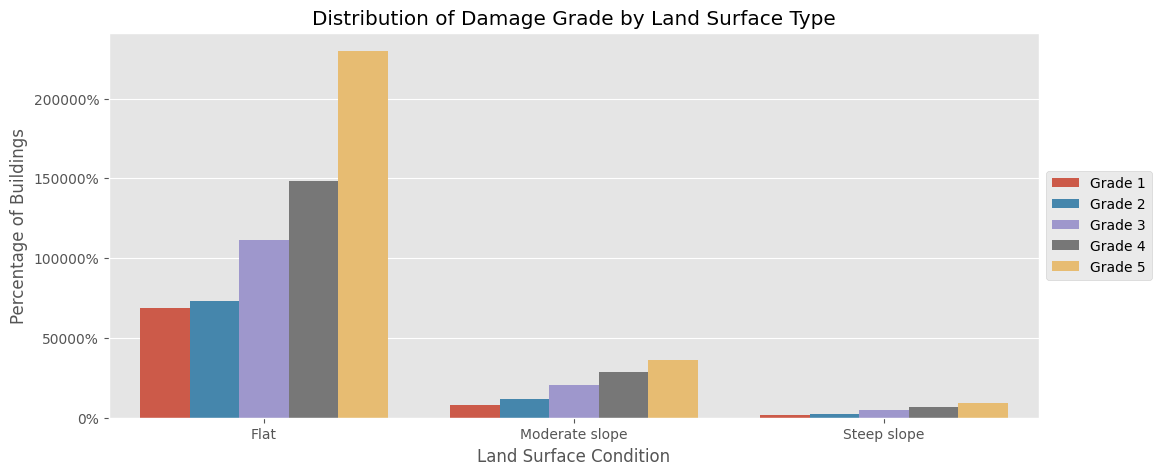

In [ ]:
# Calculate counts
df_temp = df_stru.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['land_surface_condition', 'damage_grade'])


df_temp = df_temp.reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp,
                 x = 'land_surface_condition',
                 y = 'count',
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Land Surface Type")
plt.xlabel("Land Surface Condition")
plt.ylabel("Percentage of Buildings")
plt.show()

# Clean up
del df_temp, ax

#Cell 12:

Purpose: Displays the frequency count of each unique value in the 'foundation_type' column.


In [ ]:
df_stru.foundation_type.value_counts()

,count
foundation_type,
Mud mortar-Stone/Brick,628705
Bamboo/Timber,57472
Cement-Stone/Brick,39245
RC,32120
Other,4552


#Cell 13:

Purpose: Analyzes the relationship between 'foundation_type' and 'damage_grade' by counting occurrences and visualizing the distribution using a bar plot.


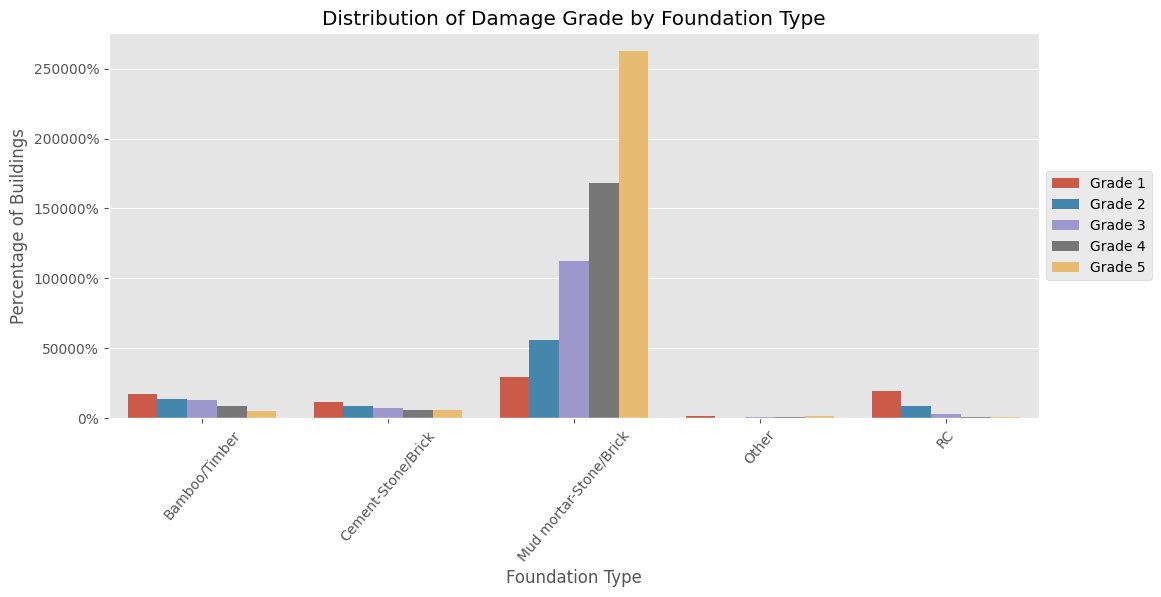

In [ ]:
# Calculate counts
df_temp = df_stru.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['foundation_type', 'damage_grade'])


# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp,
                 x = 'foundation_type',
                 y = 'count',
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Foundation Type")
plt.xlabel("Foundation Type")
plt.ylabel("Percentage of Buildings")
plt.show()

# Clean up
del df_temp, ax


#Cell 14:

Purpose: Visualizes the frequency count of different 'roof_type' values using a bar plot.

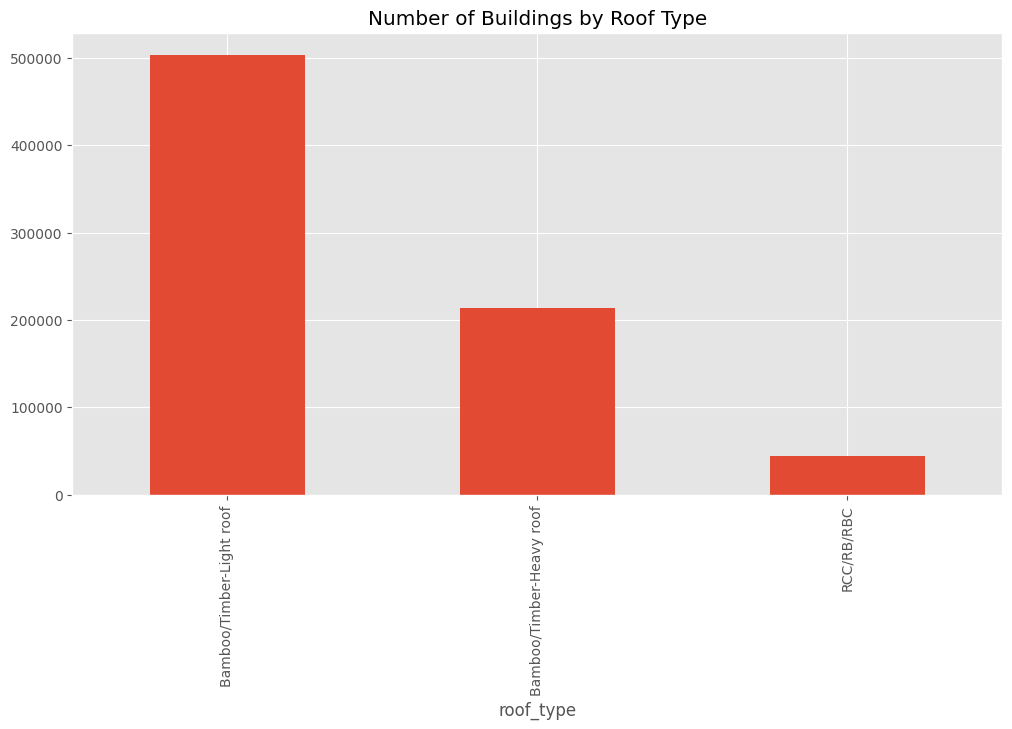

In [ ]:
plt.figure(figsize = (12,6))
ax = df_stru.roof_type.value_counts().plot(kind = "bar")
plt.title("Number of Buildings by Roof Type")
plt.show()

#Cell 15:

Purpose: Analyzes the relationship between 'roof_type' and 'damage_grade' by counting occurrences and visualizing the distribution using a heatmap.


/tmp/ipython-input-16-3000329852.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


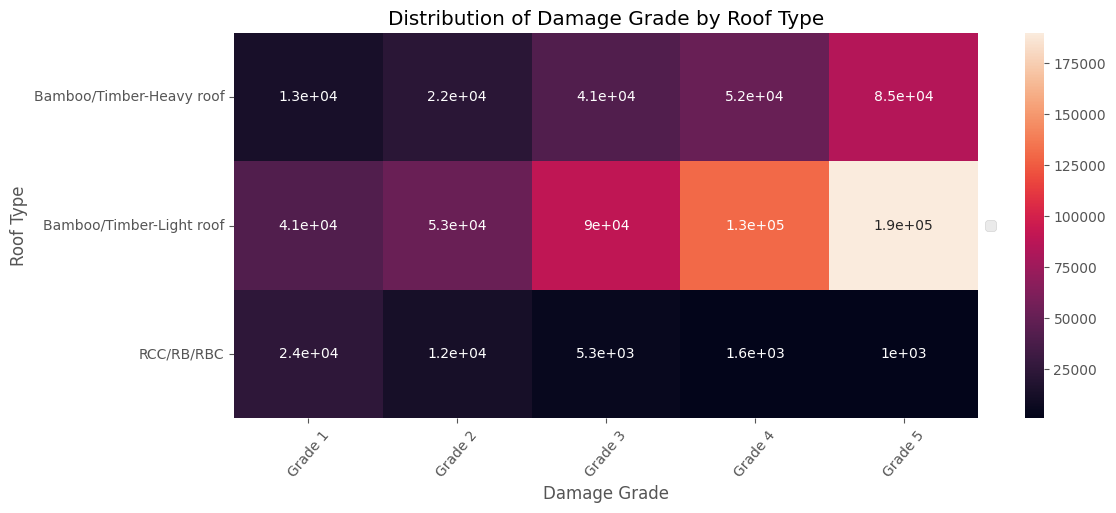

In [ ]:
# Calculate counts
df_temp = df_stru.groupby(['roof_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['roof_type', 'damage_grade'])


# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['roof_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Roof Type")
plt.xlabel("Damage Grade")
plt.ylabel("Roof Type")
plt.show()

# Clean up
del df_temp, ax

#Cell 16:

Purpose: Displays the frequency count of 'ground_floor_type' values and then analyzes and visualizes the relationship between 'ground_floor_type' and 'damage_grade' using a heatmap.

/tmp/ipython-input-17-80338740.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


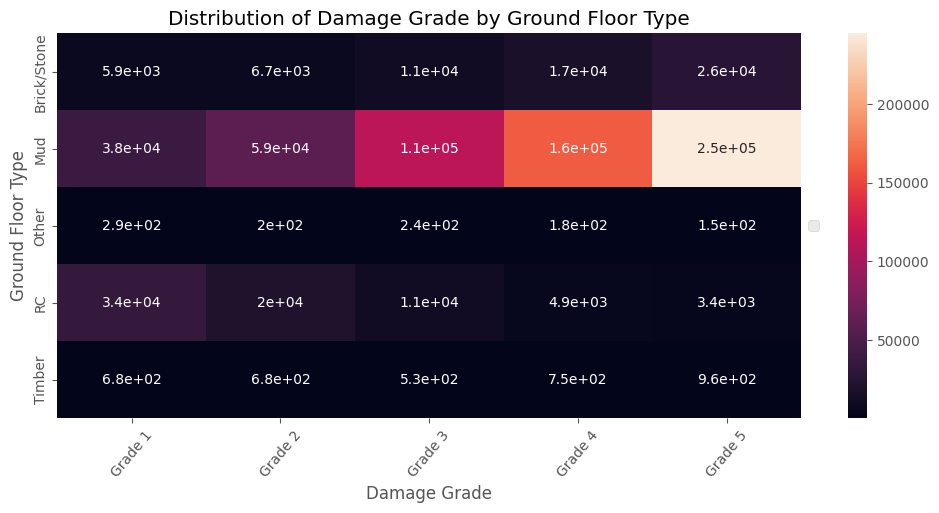

In [ ]:
df_stru.ground_floor_type.value_counts()

# Calculate counts
df_temp = df_stru.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['ground_floor_type', 'damage_grade'])


# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['ground_floor_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Ground Floor Type")
plt.xlabel("Damage Grade")
plt.ylabel("Ground Floor Type")
plt.show()

# Clean up
del df_temp, ax

#Cell 17:

Purpose: Displays the normalized frequency count of 'other_floor_type' values and then analyzes and visualizes the relationship between 'other_floor_type' and 'damage_grade' using a bar plot.

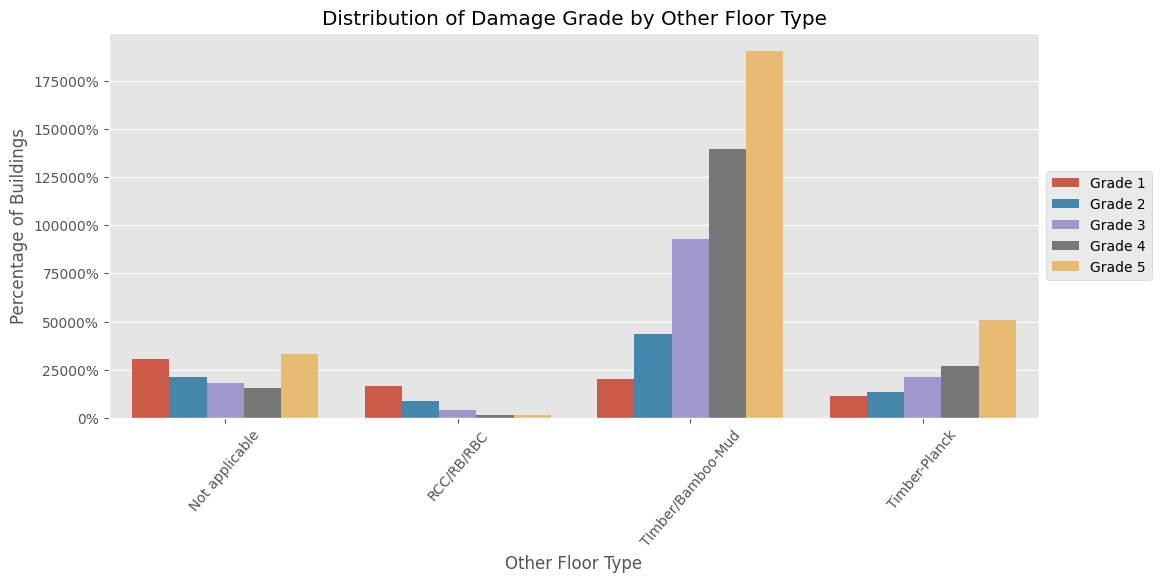

In [ ]:
df_stru.other_floor_type.value_counts(normalize = True)

# Calculate counts
df_temp = df_stru.groupby(['other_floor_type','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['other_floor_type', 'damage_grade'])


# Plot char
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp,
                 x = 'other_floor_type',
                 y = 'count',
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Other Floor Type")
plt.xlabel("Other Floor Type")
plt.ylabel("Percentage of Buildings")
plt.show()

# Clean up
del df_temp, ax

#Cell 18:

Purpose: Displays the normalized frequency count of 'position' values and then analyzes and visualizes the relationship between 'position' and 'damage_grade' using a bar plot.

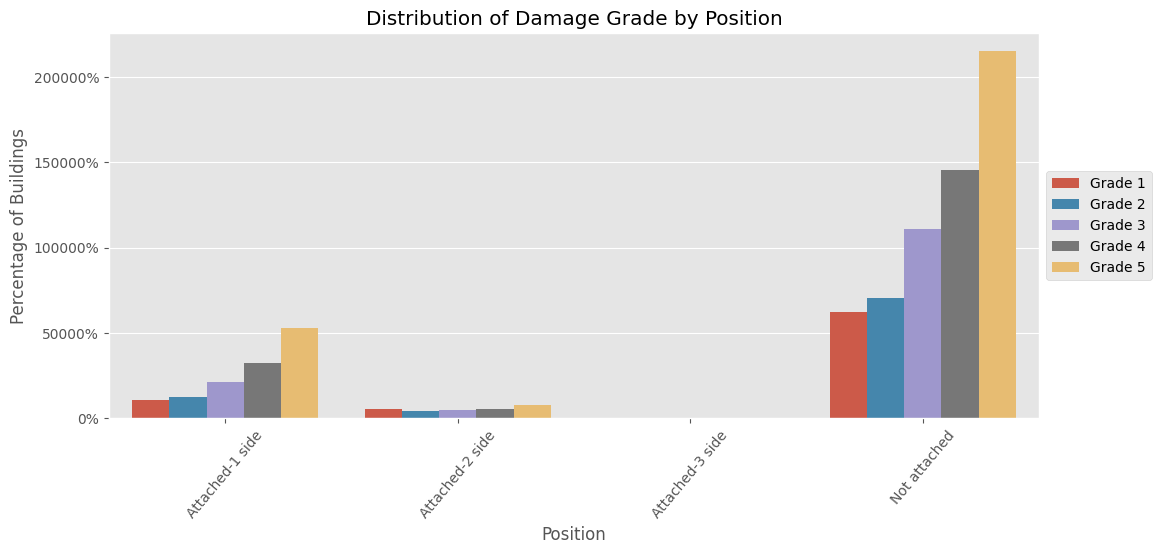

In [ ]:
df_stru.position.value_counts(normalize = True)

# Calculate counts
df_temp = df_stru.groupby(['position','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['position', 'damage_grade'])


# Plot char
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp,
                 x = 'position',
                 y = 'count',
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Position")
plt.xlabel("Position")
plt.ylabel("Percentage of Buildings")
plt.show()

# Clean up
del df_temp, ax

#Cell 19:

Purpose: Displays the frequency count of 'plan_configuration' values and then analyzes and visualizes the relationship between 'plan_configuration' and 'damage_grade' using a heatmap.

/tmp/ipython-input-20-811855318.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


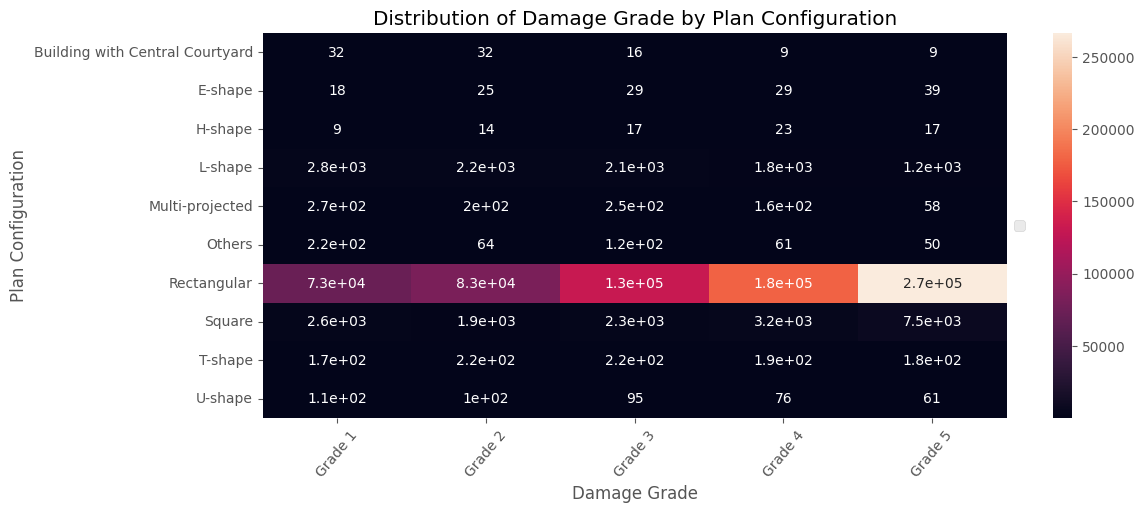

In [ ]:
df_stru.plan_configuration.value_counts()

# Calculate counts
df_temp = df_stru.groupby(['plan_configuration','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['plan_configuration', 'damage_grade'])


# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['plan_configuration'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Plan Configuration")
plt.xlabel("Damage Grade")
plt.ylabel("Plan Configuration")
plt.show()

# Clean up
del df_temp, ax

#Cell 20:

Purpose: Displays the frequency count of 'condition_post_eq' values and then analyzes and visualizes the relationship between 'condition_post_eq' and 'damage_grade' using a heatmap.

/tmp/ipython-input-21-4220376108.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


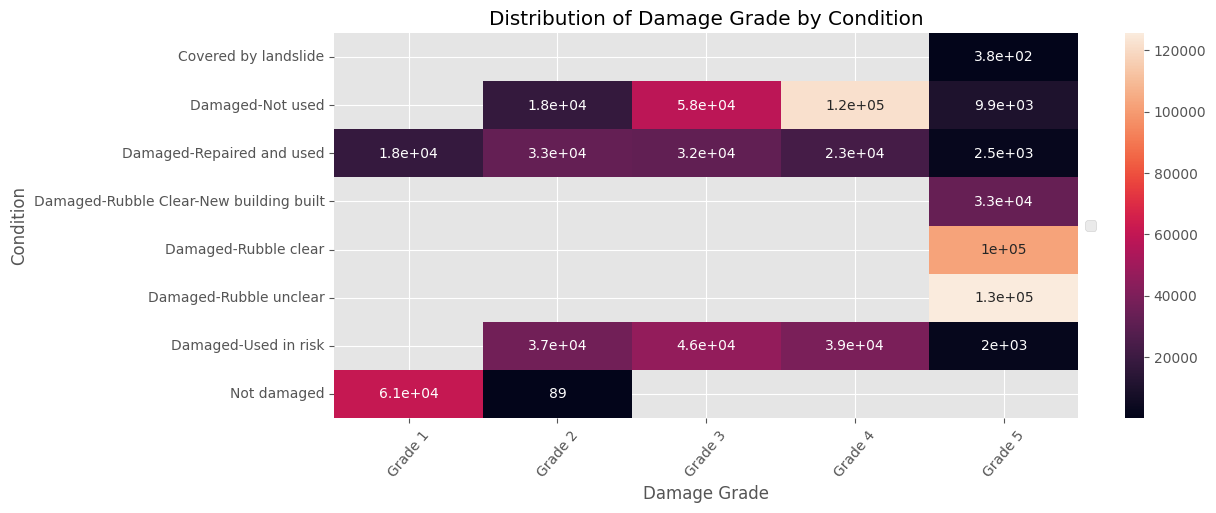

In [ ]:
df_stru.condition_post_eq.value_counts()

# Calculate counts
df_temp = df_stru.groupby(['condition_post_eq','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['condition_post_eq', 'damage_grade'])


# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['condition_post_eq'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Condition")
plt.xlabel("Damage Grade")
plt.ylabel("Condition")
plt.show()

# Clean up
del df_temp, ax

#Cell 21:

Purpose: Displays the frequency count of 'technical_solution_proposed' values and then analyzes and visualizes the relationship between 'technical_solution_proposed' and 'damage_grade' using a heatmap.

/tmp/ipython-input-22-2695573608.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


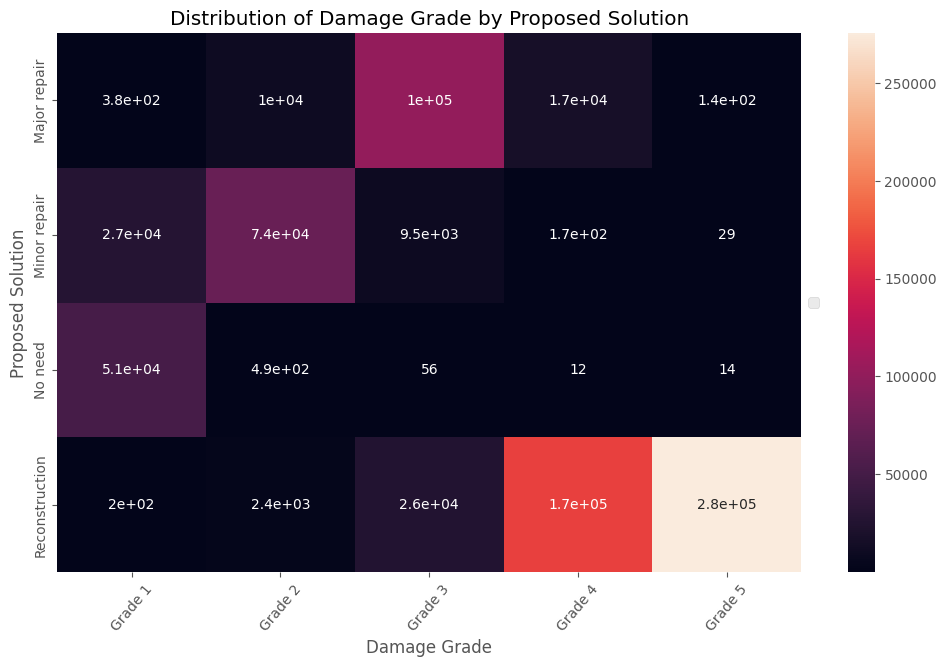

In [ ]:
df_stru.technical_solution_proposed.value_counts()

# Calculate counts
df_temp = df_stru.groupby(['technical_solution_proposed','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['technical_solution_proposed', 'damage_grade'])


# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['technical_solution_proposed'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,7))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Proposed Solution")
plt.xlabel("Damage Grade")
plt.ylabel("Proposed Solution")
plt.show()

# Clean up
del df_temp, ax

#Cell 22:

Purpose: Identifies and displays the data types of columns that are of 'float' or 'int' type (numerical).

In [ ]:
# view Names
df_stru.select_dtypes(include=[float, int]).dtypes # Data types

,0
count_floors_pre_eq,int64
count_floors_post_eq,int64
age_building,int64
plinth_area_sq_ft,int64
height_ft_pre_eq,int64
height_ft_post_eq,int64
has_superstructure_adobe_mud,int64
has_superstructure_mud_mortar_stone,int64
has_superstructure_stone_flag,int64
has_superstructure_cement_mortar_stone,int64


#Cell 23:

Purpose: Generates and displays descriptive statistics for the numerical columns in the DataFrame, excluding the count.

In [ ]:
# Describe the
df_stru.describe().transpose().drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
count_floors_pre_eq,2.087787,0.655104,1.0,2.0,2.0,2.0,9.0
count_floors_post_eq,1.252050,1.063278,0.0,0.0,1.0,2.0,9.0
age_building,24.325031,65.034555,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,406.673668,226.780437,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,16.049424,5.493900,6.0,12.0,16.0,18.0,99.0
height_ft_post_eq,9.868785,8.574218,0.0,0.0,11.0,16.0,99.0
has_superstructure_adobe_mud,0.042402,0.201504,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,0.800269,0.399799,0.0,1.0,1.0,1.0,1.0
has_superstructure_stone_flag,0.035122,0.184087,0.0,0.0,0.0,0.0,1.0
has_superstructure_cement_mortar_stone,0.015816,0.124762,0.0,0.0,0.0,0.0,1.0


#Cell 24:

Purpose: Creates box plots to compare the distribution of the number of floors and building height before and after the earthquake across different damage grades.


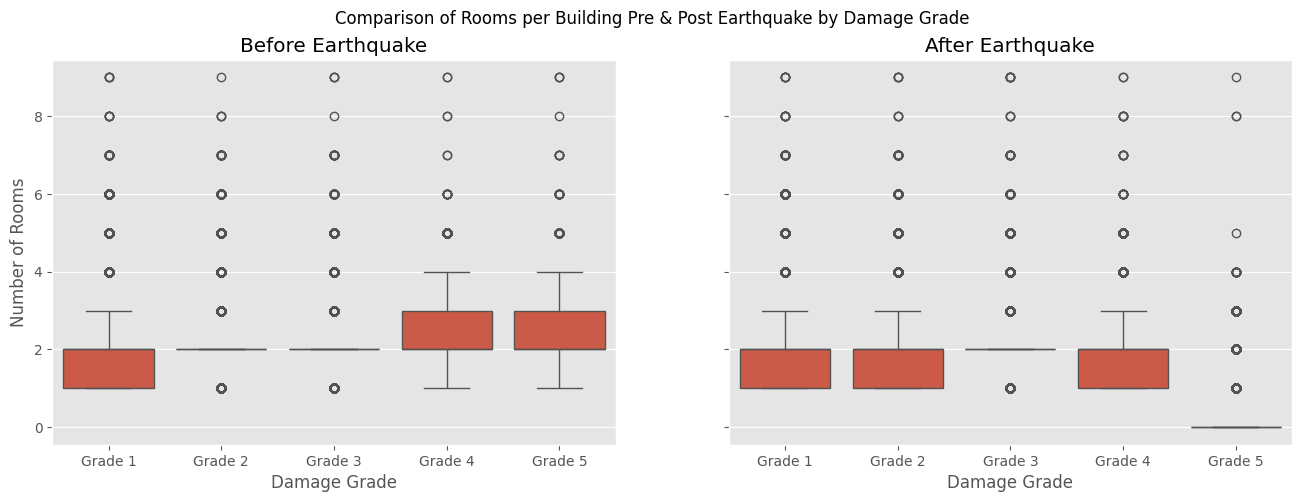

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,5), sharey='row')
fig.suptitle("Comparison of Rooms per Building Pre & Post Earthquake by Damage Grade")
ax[0].set_title("Before Earthquake")
ax[1].set_title("After Earthquake")
sns.boxplot(data = df_stru,
            x = "damage_grade",
            y = "count_floors_pre_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[0])
sns.boxplot(data = df_stru,
            x = "damage_grade",
            y = "count_floors_post_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[1])
plt.setp(ax[:], xlabel='Damage Grade')
plt.setp(ax[0], ylabel='Number of Rooms')
plt.setp(ax[1], ylabel=None)
plt.show()

#Cell 25:

Purpose: Defines a function ecdf to calculate the Empirical Cumulative Distribution Function for a given series of data.

In [ ]:
def ecdf(series):
    ''' This function calculates the ECDF for a series of real numbers'''

    # Number of data points
    n = len(series)

    # Sort output
    x = np.sort(series)

    # Sequence proportion
    y = np.arange(1, n+ 1) / n * 100

    # Return dataframe
    return pd.DataFrame({'x':x, 'y':y})

#Cell 26:

Purpose: Creates and displays Empirical Cumulative Distribution Function (ECDF) plots for the 'age_building' column, both for the complete dataset and a filtered dataset (removing outliers), broken down by damage grade.

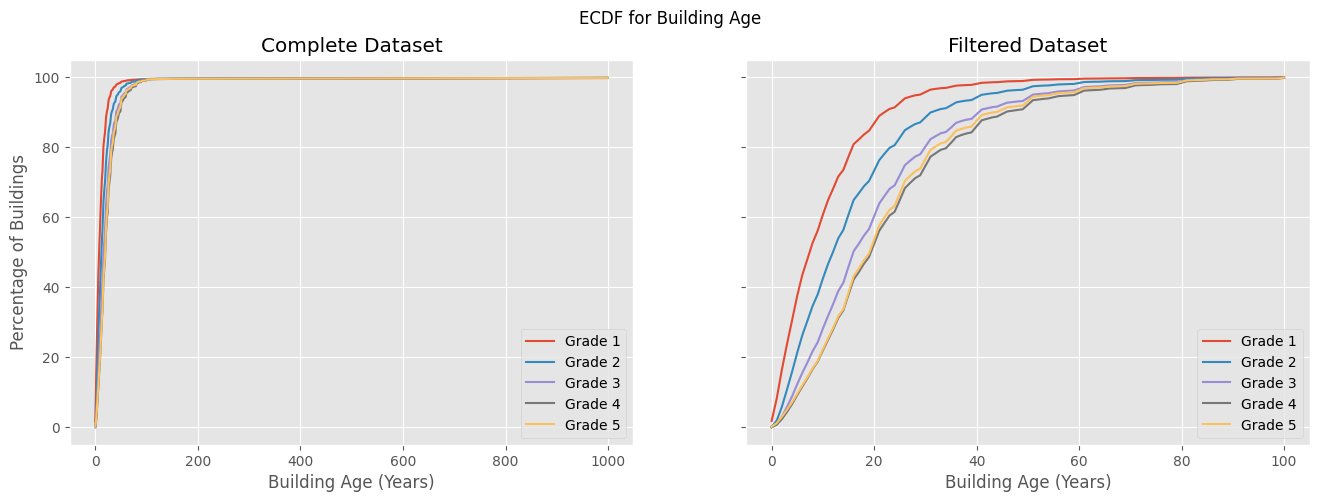

In [ ]:
# List each grade
v_grades = ['Grade ' + str(x) for x in range(1,6)]

# Create a plot template
fig, ax = plt.subplots(1,2, figsize = (16,5), sharey='row')
fig.suptitle("ECDF for Building Age")
ax[0].set_title("Complete Dataset")
ax[1].set_title("Filtered Dataset")

# Create a ecdf for each grade
for grade in v_grades:
    df_temp = df_stru[df_stru.damage_grade == grade] # filter for grade only
    df_temp = ecdf(df_temp.age_building) # Compute ecdf for grade
    sns.lineplot(data = df_temp, x = 'x', y = 'y', label = grade, ax = ax[0]) # Generate line plot
    del df_temp

# Create a ecdf for each grade - Remove outliers
for grade in v_grades:
    df_temp = df_stru[(df_stru.damage_grade == grade) & (df_stru.age_building <= 100)] # filter
    df_temp = ecdf(df_temp.age_building) # Compute ecdf for grade
    sns.lineplot(data = df_temp, x = 'x', y = 'y', label = grade, ax = ax[1]) # Generate line plot
    del df_temp

# show plot
plt.setp(ax[:], xlabel='Building Age (Years)')
plt.setp(ax[0], ylabel='Percentage of Buildings')
plt.setp(ax[1], ylabel=None)
plt.show()

# Clear objects
del grade, v_grades, fig, ax

#Cell 27:

Purpose: Creates and displays distribution plots (histograms) for the 'plinth_area_sq_ft' column, filtered to remove outliers, for each damage grade.


/tmp/ipython-input-28-1445794635.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df_temp['plinth_area_sq_ft'], label = grade, kde=False, ax=ax[count])


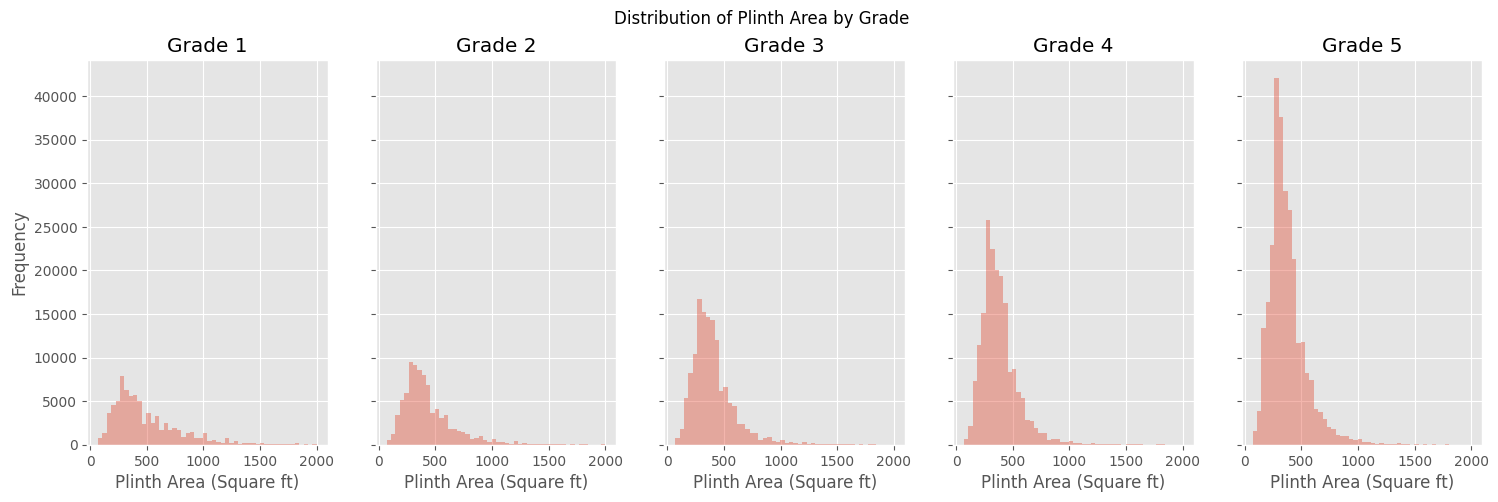

In [ ]:
# List of grades
v_grades = ['Grade ' + str(x) for x in range(1,6)]

# Plot structure
fig, ax = plt.subplots(1, 5, figsize=(18,5), sharey="row", sharex="row")
fig.suptitle("Distribution of Plinth Area by Grade")

# Build plot
count = 0
for grade in v_grades:
    df_temp = df_stru[(df_stru.damage_grade == grade) & (df_stru.plinth_area_sq_ft <= 2000)] # filter for grade
    ax[count].set_title(grade)
    sns.distplot(a = df_temp['plinth_area_sq_ft'], label = grade, kde=False, ax=ax[count])
    del df_temp
    count += 1

# Plot Aesthetics
plt.setp(ax[:], xlabel='Plinth Area (Square ft)')
plt.setp(ax[0], ylabel='Frequency')
plt.show()

# Clear objects
del grade, v_grades, fig, ax, count

#Cell 28:

Purpose: Creates box plots to compare the distribution of building height before and after the earthquake across different damage grades.


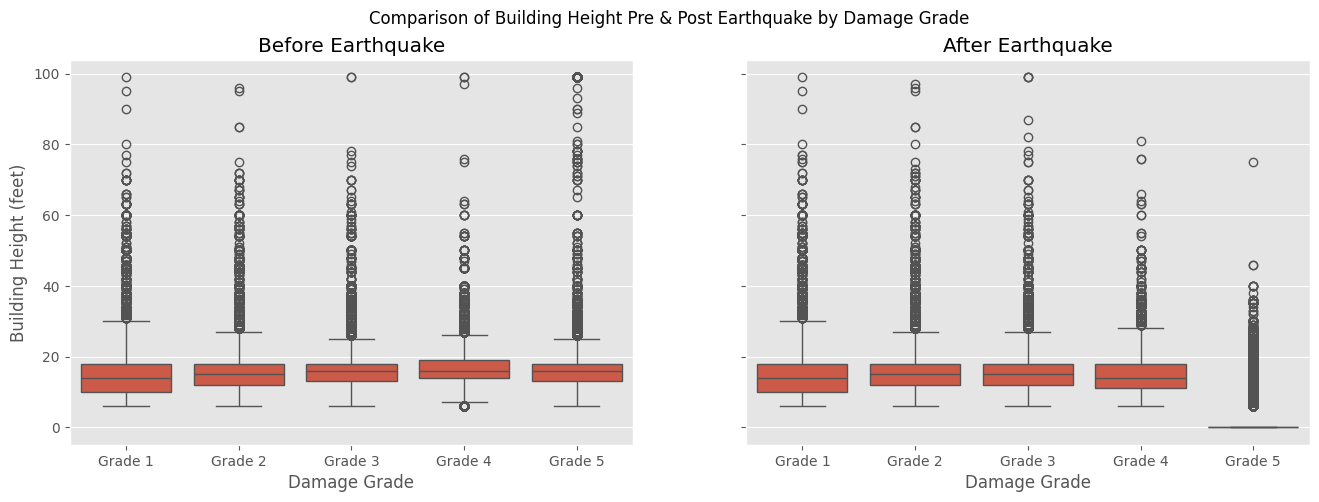

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,5), sharey='row')
fig.suptitle("Comparison of Building Height Pre & Post Earthquake by Damage Grade")
ax[0].set_title("Before Earthquake")
ax[1].set_title("After Earthquake")
sns.boxplot(data = df_stru,
            x = "damage_grade",
            y = "height_ft_pre_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[0])
sns.boxplot(data = df_stru,
            x = "damage_grade",
            y = "height_ft_post_eq",
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[1])
plt.setp(ax[:], xlabel='Damage Grade')
plt.setp(ax[0], ylabel='Building Height (feet)')
plt.setp(ax[1], ylabel=None)
plt.show()

# clear objects
del fig, ax

#Cell 29:

Purpose: Analyzes the proportion of different superstructure types for each damage grade and visualizes these proportions using polar plots (radar charts).


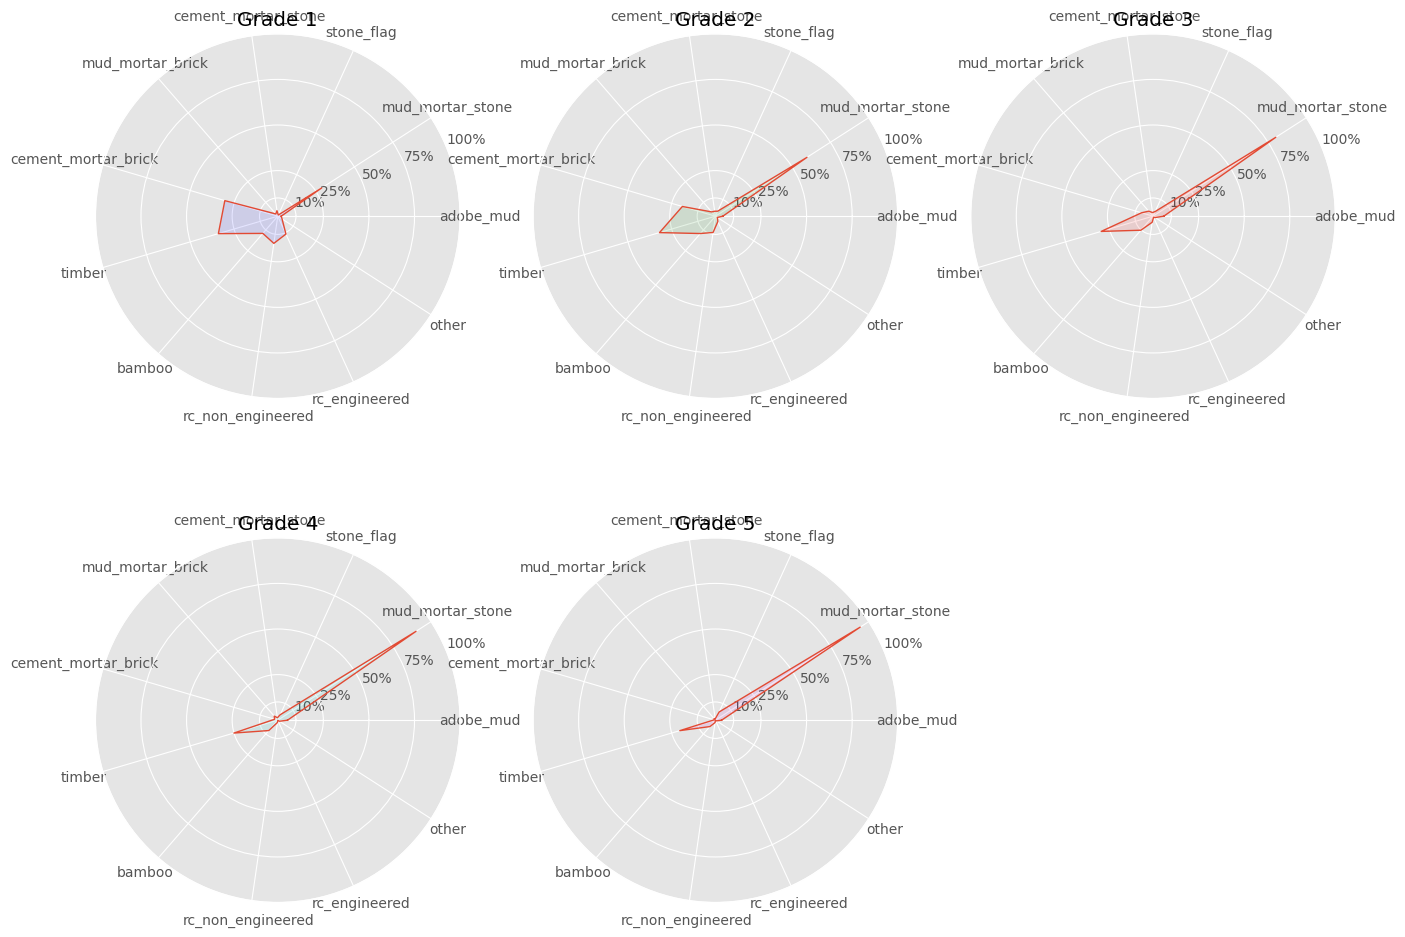

In [ ]:
# list of binary columns
v_cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
          'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
          'has_superstructure_timber', 'has_superstructure_bamboo',
          'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
          'has_superstructure_other']

# New Names of Binary Cols
v_names = {'has_superstructure_adobe_mud':'adobe_mud',
           'has_superstructure_mud_mortar_stone':'mud_mortar_stone',
          'has_superstructure_stone_flag':'stone_flag',
           'has_superstructure_cement_mortar_stone':'cement_mortar_stone',
          'has_superstructure_mud_mortar_brick':'mud_mortar_brick',
           'has_superstructure_cement_mortar_brick':'cement_mortar_brick',
          'has_superstructure_timber':'timber',
           'has_superstructure_bamboo':'bamboo',
          'has_superstructure_rc_non_engineered':'rc_non_engineered',
           'has_superstructure_rc_engineered':'rc_engineered',
          'has_superstructure_other':'other'}

# Summarise and rename columns
df_temp = df_stru.groupby('damage_grade')[v_cols].agg('mean').reset_index()
df_temp.rename(columns=v_names, inplace = True)

# Lists to use
v_grades = ['Grade ' + str(x) for x in range(1,6)]
v_colour = ['b', 'g', 'r', 'c', 'm']

# number of variables
v_categories = list(df_temp)[1:]
v_N = len(v_categories)

# Angles
v_angles = [n / float(v_N) * 2 * pi for n in range(v_N)]
v_angles += v_angles[:1]

# Initialise the plot
fig, ax = plt.subplots(2,3, figsize = (16,12), subplot_kw=dict(polar=True))

# Format axis
plt.setp(ax, # X
         xticks = v_angles[:-1],
         xticklabels = v_categories,
         yticks = [0.10,0.25,0.50,0.75,1.0],
         yticklabels = ["10%","25%","50%","75%","100%"],
         ylim = (0,1))

# Populate plot in a loop
count, row, col = 0, 0, 0
for grade in v_grades:
    values = df_temp.loc[count].drop('damage_grade').values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(v_angles, values, linewidth=1, linestyle='solid', label=grade)
    ax[row, col].fill(v_angles, values, v_colour[count], alpha=0.1)
    ax[row, col].set_title(grade)

    # Increment counters
    if count >= 2:
        row = 1

    if col < 2:
        col += 1
    else:
        col = 0

    count += 1 # increase count

# Drop 6th subplot
fig.delaxes(ax[1,2])

# Clear objects
del v_cols, v_names, df_temp, v_grades, v_colour,\
    v_categories, v_N, v_angles, fig, ax, count, row, col, grade

#Cell 30:

Purpose: Creates new features in the DataFrame: 'net_rooms' (difference in floors before and after) and 'net_height' (difference in height before and after).

In [ ]:
# New fields to add
df_stru['net_rooms'] = df_stru.count_floors_post_eq - df_stru.count_floors_pre_eq
df_stru['net_height'] = df_stru.height_ft_post_eq - df_stru.height_ft_pre_eq

# Create training and testing data


#Cell 31:

Purpose: Splits the data into training and testing sets for machine learning, ensuring that the proportion of each damage grade is maintained in both sets (stratified splitting). It also displays the proportions of damage grades in the train and test sets to confirm stratification.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_stru.drop('damage_grade', axis = 1),
                                                    df_stru['damage_grade'],
                                                    test_size = 0.2,
                                                    random_state = 1989,
                                                    stratify = df_stru['damage_grade'],
                                                    shuffle=True)


# Visualise proportions on train and test
train_proportions = y_train.value_counts(normalize = True).reset_index(name="train")
test_proportions = y_test.value_counts(normalize = True).reset_index(name="test")

# Rename the column containing damage grades for merging
train_proportions.rename(columns={'index': 'damage_grade'}, inplace=True)
test_proportions.rename(columns={'index': 'damage_grade'}, inplace=True)

pd.merge(train_proportions,
         test_proportions,
         on = "damage_grade",
         how = "left")

,damage_grade,train,test
0,Grade 5,0.361853,0.361851
1,Grade 4,0.241235,0.241236
2,Grade 3,0.178995,0.179000
3,Grade 2,0.114497,0.114494
4,Grade 1,0.103419,0.103419


#Cell 32:

Purpose: Encodes the target variable ('damage_grade') into numerical labels using Label Encoding. It also displays the normalized counts of the transformed target variable in the training set.

In [ ]:


# Target Variable Transformer
preprocessor_tar = LabelEncoder()
y_train = preprocessor_tar.fit_transform(y_train)
y_test = preprocessor_tar.fit_transform(y_test)

# Visualise Counts
pd.DataFrame(y_train).value_counts(normalize = True)

# Clean objects
del preprocessor_tar

#Cell 33:

Purpose: Defines a preprocessing pipeline using ColumnTransformer to apply different transformations to different types of features (converting to object, handling outliers, scaling numerical features, one-hot encoding categorical features, and removing low-variance features). It then applies these transformations to the training and testing data.

In [ ]:
# Print x train shape before processing
print("Before preprocessing there were {} rows and {} columns".format(*x_train.shape))


# Identify columns
fts_cvt_obj = ['district_id', 'vdcmun_id', 'ward_id']
fts_outlier = ['age_building']
fts_cat = df_stru.drop(fts_cvt_obj, axis = 1).select_dtypes(include=['object']).drop('damage_grade', axis = 1).columns
fts_num = df_stru.select_dtypes(np.number).columns

# Convert to object Transformer
def covert_to_object(x):
    '''Converts a column to object'''
    return pd.DataFrame(x).astype(object)
trans_to_object = Pipeline(steps = [('convert_to_object', FunctionTransformer(covert_to_object))])

# Outlier Restriction
trans_outlier = Pipeline(steps = [('Outlier_scaler', RobustScaler(quantile_range = (0,0.9)))])

# Categorical Transformer
trans_cat = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Numerical Transformer
trans_num = Pipeline(steps = [('scaler', StandardScaler()),
                              ('MinMax', MinMaxScaler())])

# Zero or Near Zero variance
trans_nzv = Pipeline(steps = [('nzv', VarianceThreshold(threshold = 0.01))])

# Create a single Preprocessing step for predictors
preprocessor_preds = ColumnTransformer(
    transformers=[
        ('convert_to_object', trans_to_object, fts_cvt_obj),
        ('Outlier', trans_outlier, fts_outlier),
        ('num', trans_num, fts_num),
        ('cat', trans_cat, fts_cat),
        ('nzv', trans_nzv,[])
    ])

# Apply the transformations to both train and test
x_train = preprocessor_preds.fit_transform(x_train)
x_test = preprocessor_preds.fit_transform(x_test)

# Print x train shape before processing
print("After preprocessing there are {} rows and {} columns".format(*x_train.shape))

# Clean objects
del fts_cvt_obj, fts_outlier, fts_cat, fts_num, covert_to_object, trans_to_object, trans_outlier, trans_cat, trans_num, trans_nzv

Before preprocessing there were 609675 rows and 31 columns
After preprocessing there are 609675 rows and 69 columns


#Cell 34:

Purpose: Initializes a K-fold cross-validation object with a specified number of splits and random state.

In [ ]:
# Store the Kfold object
kfold = KFold(n_splits=5, random_state=1989, shuffle = True)

#Cell 35:

Purpose: Imports additional evaluation metrics from scikit-learn: accuracy_score and mean_squared_error.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#Cell 36:

Purpose: Installs the xlsxwriter library, which is used for writing data to Excel files.

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 3.6 MB/s eta 0:00:00


#Cell 37:

Purpose: Builds and trains a Random Forest Classifier model on the training data, makes predictions on the test data, evaluates the model's accuracy and Mean Squared Error (MSE), displays a confusion matrix, and saves the actual test data and the model's predictions to Excel files.


Test Accuracy of random forest Model:  89.48 %

Train Accuracy of random forest Model:  99.81 %

Mean Squared Error (MSE):  0.3438


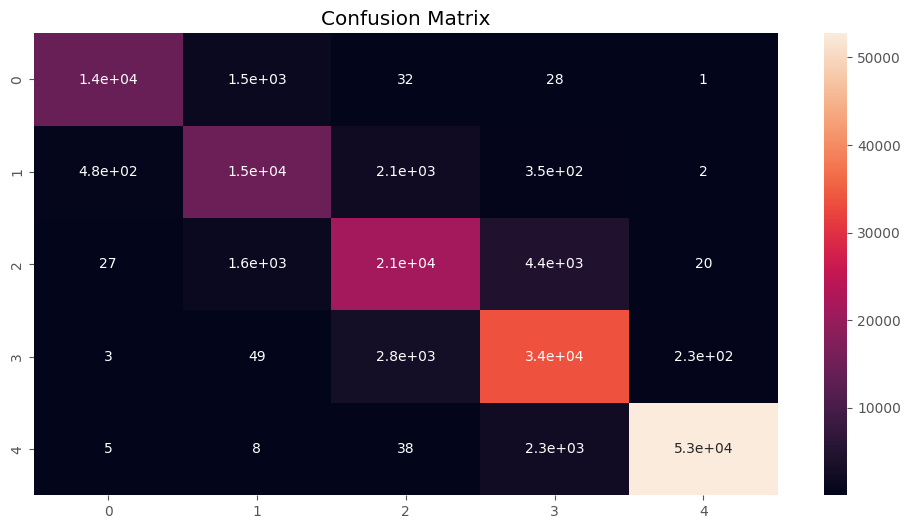

In [ ]:
# Build the random forest on the full training data
rf = RandomForestClassifier() # instance
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# Calculate confusion matrix
con_mat = confusion_matrix(y_test, y_pred)


print('Test Accuracy of random forest Model: ',round(100*rf.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of random forest Model: ',round(100*rf.score(x_train, y_train),2),'%')
print('')

# Evaluate model

print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))


# Plot Model
plt.figure(figsize = (12,6))
ax = sns.heatmap(con_mat, annot = True)
plt.title("Confusion Matrix")
plt.show()

y_test_data = pd.DataFrame(y_test)
writer = pd.ExcelWriter("y-test-RF.xlsx", engine='xlsxwriter')
y_test_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
#writer.save()

y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_RF.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)


#Cell 38:

Purpose: Builds and trains an ElasticNet Regression model on the training data, makes predictions on the test data, evaluates the model's accuracy and Mean Squared Error (MSE), and saves the model's predictions to an Excel file.


In [ ]:
#ElacticNet Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
reg=ElasticNet(alpha=0.001,l1_ratio=1,max_iter=1000000,tol=0.01)
reg.fit(x_train, y_train)
print('Test Accuracy of ElasticNet Model: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of ElasticNet Model: ',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)

print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))


y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_Elactic.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
#writer.save()

Test Accuracy of ElasticNet Model:  92.56 %

Train Accuracy of ElasticNet Model:  92.67 %

Mean Squared Error (MSE):  0.3663


#Cell 39:

Purpose: Builds and trains a Decision Tree Regressor model on the training data, makes predictions on the test data, evaluates the model's accuracy and Mean Squared Error (MSE), and saves the model's predictions to an Excel file.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
reg=DecisionTreeRegressor()
reg.fit(x_train, y_train)
print('Test Accuracy of DecisionTree Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of DecisionTree Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))


y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_DT.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
#writer.save()

Test Accuracy of DecisionTree Regression:  89.27 %

Train Accuracy of DecisionTree Regression: 99.94 %

Mean Squared Error (MSE):  0.4398


We explored various features of building structures and their relationship with earthquake damage grades. We then trained three models: Random Forest Classifier, ElasticNet Regression, and Decision Tree Regressor.

**Looking at the performance metrics:**



*   **Random Forest Classifier:** Achieved a test accuracy of 89.48% and a Mean Squared Error (MSE) of 0.3438. It showed a significant difference between training and testing accuracy, suggesting some overfitting.
*   **ElasticNet Regression:** Achieved a test accuracy of 92.56% and an MSE of 0.3663. The training and testing accuracies were very close, indicating a good fit to the data without significant overfitting.
*  **Decision Tree Regressor:** Achieved a test accuracy of 89.27% and an MSE of 0.4398. Similar to the Random Forest, it showed a notable difference between training and testing accuracy, suggesting overfitting.



**Which model is more suitable: Linear Regression or Non-linear?**
The models we trained were Random Forest (non-linear), ElasticNet (linear/regularized linear), and Decision Tree (non-linear).

Based on the results:



*   The **ElasticNet Regression** model, which is a type of linear model with regularization, achieved the highest test accuracy and had minimal overfitting compared to the non-linear models (Random Forest and Decision Tree).
*   While the non-linear models achieved high training accuracy, their performance on the test set was slightly lower than ElasticNet, and they showed signs of overfitting.



Therefore, in this case, the **ElasticNet Regression (a linear model with regularization)** appears to be the most suitable model among the ones tested, providing a good balance between accuracy and avoiding overfitting. This suggests that a linear relationship, perhaps with some complexity handled by the regularization, might be a better fit for predicting damage grade in this dataset compared to the highly non-linear models.

It's important to note that "linear" and "non-linear" refer to the relationship between the input features and the output. While ElasticNet is a linear model in terms of its equation, the features themselves might have been transformed (as done in the preprocessing step), which can allow a linear model to capture some non-linear patterns in the original data.